In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

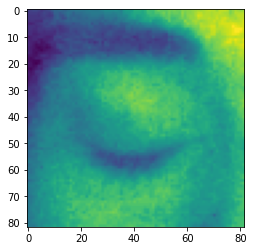

In [2]:
plt.imshow(plt.imread(r'P:/prml_project/drowsieness_detection/data/test/closed/s0001_00007_0_0_0_0_0_01.png'))

In [3]:
image = plt.imread(r'P:/prml_project/drowsieness_detection/data/test/closed/s0001_00007_0_0_0_0_0_01.png')

image.shape

batch_Size = 8

In [4]:
#  Data Preprocessing

# Preprocessing the Training set  
        
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)  #validation_data = 20%

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(r'P:/prml_project/drowsieness_detection/data/train',
                                                 target_size = (86, 86),
                                                 batch_size = batch_Size,
                                                 class_mode = 'categorical',
                                                 shuffle = True,
                                                 subset = 'training')

valid_data = train_datagen.flow_from_directory(r'P:/prml_project/drowsieness_detection/data/train',
                                                 target_size = (86, 86),
                                                 batch_size = batch_Size,
                                                 class_mode = 'categorical',
                                                 shuffle = True,
                                                 subset = 'validation')

test_data = test_datagen.flow_from_directory(r'P:/prml_project/drowsieness_detection/data/test',
                                            target_size = (86, 86),
                                            batch_size = batch_Size,
                                            shuffle = False,
                                            class_mode = None)
print(train_data.class_indices)

Found 54336 images belonging to 2 classes.
Found 13583 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
{'closed': 0, 'open': 1}


In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(86,86,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          1

In [10]:
#history = model.fit_generator(
#  train_data,
#  validation_data=test_data,
#  epochs=5,
#  steps_per_epoch=len(train_data),
#  validation_steps=len(test_data)
#)
STEP_SIZE_TRAIN=train_data.n//train_data.batch_size
STEP_SIZE_VALID=valid_data.n//valid_data.batch_size
history = model.fit(train_data,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_data,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)


Epoch 1/10
6792/6792 [==============================] - 180s 25ms/step - loss: 0.2193 - accuracy: 0.9155 - val_loss: 0.2575 - val_accuracy: 0.8889
Epoch 2/10
6792/6792 [==============================] - 169s 25ms/step - loss: 0.1203 - accuracy: 0.9564 - val_loss: 0.2037 - val_accuracy: 0.9099
Epoch 3/10
6792/6792 [==============================] - 165s 24ms/step - loss: 0.0988 - accuracy: 0.9644 - val_loss: 0.2462 - val_accuracy: 0.9048
Epoch 4/10
6792/6792 [==============================] - 162s 24ms/step - loss: 0.0909 - accuracy: 0.9674 - val_loss: 0.2563 - val_accuracy: 0.8939
Epoch 5/10
6792/6792 [==============================] - 164s 24ms/step - loss: 0.0825 - accuracy: 0.9709 - val_loss: 0.2106 - val_accuracy: 0.9041
Epoch 6/10
6792/6792 [==============================] - 164s 24ms/step - loss: 0.0801 - accuracy: 0.9725 - val_loss: 0.2215 - val_accuracy: 0.9003
Epoch 7/10
6792/6792 [==============================] - 168s 25ms/step - loss: 0.0773 - accuracy: 0.9731 - val_loss: 0

In [11]:
len(test_data)

2123

In [12]:
len(train_data)

6792

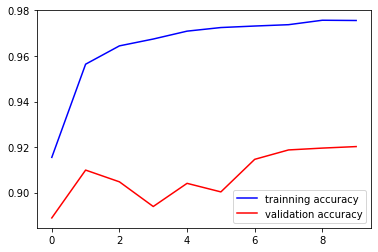

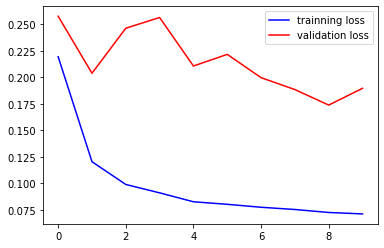

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model.save('drowsiness_detection_basemodel2.h5')

In [16]:
# load model
model = load_model('drowsiness_detection_basemodel2.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          1

In [18]:
#model evaluation

acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

acc_tr, loss_tr = model.evaluate(valid_data)
print(acc_tr)
print(loss_tr)

acc_tr, loss_tr = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

6792/6792 [==============================] - 136s 20ms/step - loss: 0.0593 - accuracy: 0.9803
0.05925294756889343
0.9803261160850525
1698/1698 [==============================] - 33s 19ms/step - loss: 0.1853 - accuracy: 0.92130s - loss: 0.1850 - accura
0.18527860939502716
0.9212986826896667
2123/2123 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
0.0
0.0


In [1]:
#predict output
import numpy as np

STEP_SIZE_TEST=test_data.n//test_data.batch_size+1
test_data.reset()
y_pred=model.predict_generator(test_data,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class=np.argmax(y_pred,axis=1)
print(predicted_class)

NameError: name 'test_data' is not defined

In [36]:
#Confusion Matrix and Classification Report
import sklearn.metrics as metrics


true_class = test_data.classes
#true_class = tf.concat([y for y in test_data], axis=0)
print(true_class.shape)
print(predicted_class.shape)

print(true_class)
class_labels = list(test_data.class_indices.keys())  
print(class_labels)

print('Confusion Matrix')
cm = metrics.confusion_matrix(true_class, predicted_class)
print(cm)

print('Classification Report')
cr = metrics.classification_report(true_class, predicted_class, target_names=class_labels)
print(cr)

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm)

(16979,)
(16979,)
[0 0 0 ... 1 1 1]
['closed', 'open']
Confusion Matrix
[[8011  378]
 [ 215 8375]]
Classification Report
              precision    recall  f1-score   support

      closed       0.97      0.95      0.96      8389
        open       0.96      0.97      0.97      8590

    accuracy                           0.97     16979
   macro avg       0.97      0.96      0.97     16979
weighted avg       0.97      0.97      0.97     16979



0.9650745037988103

In [37]:
import cv2

img_array = cv2.imread(r'P:/prml_project/drowsieness_detection/data/test/open/s0037_09363_1_1_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (86, 86))
X_input = np.array(new_array).reshape(-1, 86, 86, 3)
X_input.shape

(1, 86, 86, 3)

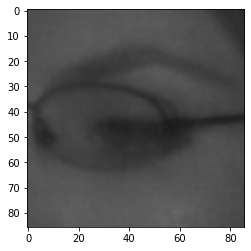

In [38]:
plt.imshow(new_array)

In [39]:
X_input = X_input/255.0
prediction = model.predict(X_input)

In [40]:
np.argmax(prediction)

1